In [1]:
import glob
import pandas as pd
paths = glob.glob("train/cat.*.jpg")
catdf = pd.DataFrame(columns=["path", "target"])
catdf["path"] = paths
catdf["target"] = 0

paths = glob.glob("train/dog.*.jpg")
dogdf = pd.DataFrame(columns=["path", "target"])
dogdf["path"] = paths
dogdf["target"] = 1

traindf = pd.concat([catdf, dogdf], ignore_index=True)
traindf

,path,target
0,train\cat.0.jpg,0
1,train\cat.1.jpg,0
2,train\cat.10.jpg,0
3,train\cat.100.jpg,0
4,train\cat.1000.jpg,0
5,train\cat.10000.jpg,0
6,train\cat.10001.jpg,0
7,train\cat.10002.jpg,0
8,train\cat.10003.jpg,0
9,train\cat.10004.jpg,0


In [2]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers import BatchNormalization
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
for l in vgg.layers:
    l.trainable = False
x = BatchNormalization()(vgg.output)
x = Flatten()(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="softmax")(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [4]:
# numpy array
import numpy as np
# scikit-learn
from sklearn.model_selection import train_test_split
x = np.array(traindf["path"])
y = np.array(traindf["target"])
# [90%x, 10%x, 90%y, 10%y]
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.1)

In [5]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [6]:
# PIL: Pillow
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input
img = load_img(x_train[0], target_size=(224, 224, 3))
preprocess_input(np.array(img))

array([[[ 16.060997 ,  10.221001 ,  -1.6800003],
        [  4.060997 ,  -1.7789993, -13.68     ],
        [  4.060997 ,  -1.7789993, -13.68     ],
        ...,
        [ 24.060997 ,  61.221    ,  66.32     ],
        [ 23.060997 ,  60.221    ,  65.32     ],
        [ 22.060997 ,  59.221    ,  64.32     ]],

       [[  5.060997 ,  -0.7789993, -12.68     ],
        [  5.060997 ,  -0.7789993, -12.68     ],
        [  2.060997 ,  -3.7789993, -15.68     ],
        ...,
        [ 26.060997 ,  63.221    ,  68.32     ],
        [ 25.060997 ,  62.221    ,  67.32     ],
        [ 24.060997 ,  61.221    ,  66.32     ]],

       [[ -2.939003 ,  -8.778999 , -20.68     ],
        [  1.060997 ,  -4.7789993, -16.68     ],
        [ -1.939003 ,  -7.7789993, -19.68     ],
        ...,
        [ 27.060997 ,  64.221    ,  69.32     ],
        [ 26.060997 ,  63.221    ,  68.32     ],
        [ 25.060997 ,  62.221    ,  67.32     ]],

       ...,

       [[-31.939003 , -34.779    , -34.68     ],
        [-4

In [7]:
batch = 20
train = 10
for i in range(train):
    img_list = []
    idx = np.random.randint(0, x_train.shape[0], batch)
    for fp in x_train[idx]:
        img = load_img(fp, target_size=(224, 224, 3))
        img_pre = preprocess_input(np.array(img))
        img_list.append(img_pre)
    x_train_np = np.array(img_list)
    y_train_np = np.array(y_train_cat[idx])
    result = cnn.train_on_batch(x_train_np, y_train_np)
    print("-" * 15, i, "-" * 15)
    print(result)

--------------- 0 ---------------
[1.1453967, 0.45]
--------------- 1 ---------------
[0.3707468, 0.95]
--------------- 2 ---------------
[3.3211646, 0.6]
--------------- 3 ---------------
[1.8287331, 0.7]
--------------- 4 ---------------
[0.016326683, 1.0]
--------------- 5 ---------------
[0.31742254, 0.95]
--------------- 6 ---------------
[0.009726143, 1.0]
--------------- 7 ---------------
[1.1795583, 0.9]
--------------- 8 ---------------
[0.9652389, 0.85]
--------------- 9 ---------------
[0.8055252, 0.95]


In [10]:
batch = 200
test_img_list = []
test_img_list_ori = []
idx = np.random.randint(0, x_test.shape[0], batch)
for fp in x_test[idx]:
    img = load_img(fp, target_size=(224, 224, 3))
    test_img_list_ori.append(np.array(img))
    img_pre = preprocess_input(np.array(img))
    test_img_list.append(img_pre)
x_test_np = np.array(test_img_list)
y_test_np = np.array(y_test_cat[idx])
y_test_ori = y_test[idx]
cnn.evaluate(x_test_np, y_test_np)

200/200 [==============================] - 149s 746ms/step


[0.5329132124036551, 0.95]

In [11]:
pre = cnn.predict(x_test_np)
pre

array([[4.18272787e-26, 1.00000000e+00],
       [1.00000000e+00, 9.59684025e-20],
       [4.11478306e-13, 1.00000000e+00],
       [1.00000000e+00, 4.52153316e-13],
       [2.29451538e-28, 1.00000000e+00],
       [1.00000000e+00, 2.04945951e-13],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.41168280e-33],
       [7.49449384e-21, 1.00000000e+00],
       [1.00000000e+00, 3.37924237e-11],
       [1.05171074e-24, 1.00000000e+00],
       [8.62060290e-09, 1.00000000e+00],
       [1.00000000e+00, 1.78127652e-25],
       [1.00000000e+00, 3.03206973e-11],
       [1.23954581e-14, 1.00000000e+00],
       [4.02005403e-32, 1.00000000e+00],
       [1.00000000e+00, 2.31653291e-32],
       [3.60992573e-12, 1.00000000e+00],
       [1.00000000e+00, 9.18448873e-26],
       [9.62031305e-01, 3.79686914e-02],
       [1.00000000e+00, 1.95785271e-15],
       [8.58687330e-03, 9.91413116e-01],
       [1.00000000e+00, 3.41069653e-24],
       [5.59001163e-23, 1.00000000e+00],
       [1.000000

到底有幾個預測錯誤: 10


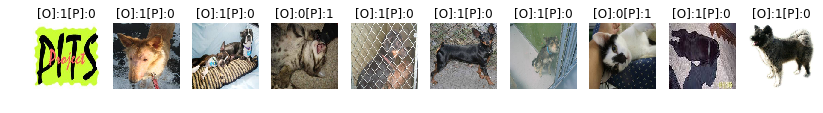

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
pre_ori = pre.argmax(axis=-1)
test_img_list_ori = np.array(test_img_list_ori)
y_test_ori = np.array(y_test_ori)
false_index = np.nonzero(pre_ori != y_test_ori)[0]
print("到底有幾個預測錯誤:", len(false_index))
false_img = test_img_list_ori[false_index]
ori_label = y_test_ori[false_index]
pre_label = pre_ori[false_index]

width = 10
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(14, 4))
for (index, img) in enumerate(false_img):
    plt.subplot(height, width, index + 1)
    msg = "[O]:" + str(ori_label[index]) + "[P]:" + str(pre_label[index])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img)